# Constructing ODF from a discrete probability distribution
This notebook illustrates the approximation of ODF as a harmonic expansion (Fourier) from the discrete probability distribution (histogram) of a fibre orientation state. The objective is to test the accuracy of series approximation of ODF directly constructed from histogram. This allows to quantify the error in series approximation before proceeding to ODF construction from image data. Analysis of images will add other error terms.

In [1]:
%config Completer.use_jedi = False
import os
import sys
sys.path.append("C:\\Users\\z5218869\\OneDrive - UNSW\\2RESEARCH\\4_Image Processing\\Anisotropy_tensor")
import numpy as np
from matplotlib_settings import *
from matplotlib import pyplot as plt
from fiborient import orient_tensor_2D, tensor2odf_2D


Bad key "text.kerning_factor" on line 4 in
C:\Users\z5218869\Miniconda3\envs\pyimgc38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


Histogram mean:  0.005555555555555556
Histogram total probability:  1.0
Total probability: 1.00
Orientation Tensor:  [[ 0.53527602 -0.01513372]
 [-0.01513372  0.46472398]]
Anisotropy Tensor:
 [[ 0.03527602 -0.01513372]
 [-0.01513372 -0.03527602]]
ODF mean:  0.005514297058474166
Total probability:  1.0477164411100917

Histogram mean:  0.005555555555555556
Histogram total probability:  1.0
Total probability: 1.00
Orientation Tensor:  [[ 0.53381022 -0.00165127]
 [-0.00165127  0.46618978]]
Anisotropy Tensor:
 [[ 0.03381022 -0.00165127]
 [-0.00165127 -0.03381022]]
ODF mean:  0.00551601143357631
Total probability:  1.0480421723794988

Histogram mean:  0.005555555555555557
Histogram total probability:  1.0000000000000002
Total probability: 1.00
Orientation Tensor:  [[0.55638754 0.00662992]
 [0.00662992 0.44361246]]
Anisotropy Tensor:
 [[ 0.05638754  0.00662992]
 [ 0.00662992 -0.05638754]]
ODF mean:  0.005489605211383663
Total probability:  1.043024990162896

Histogram mean:  0.005555555555555

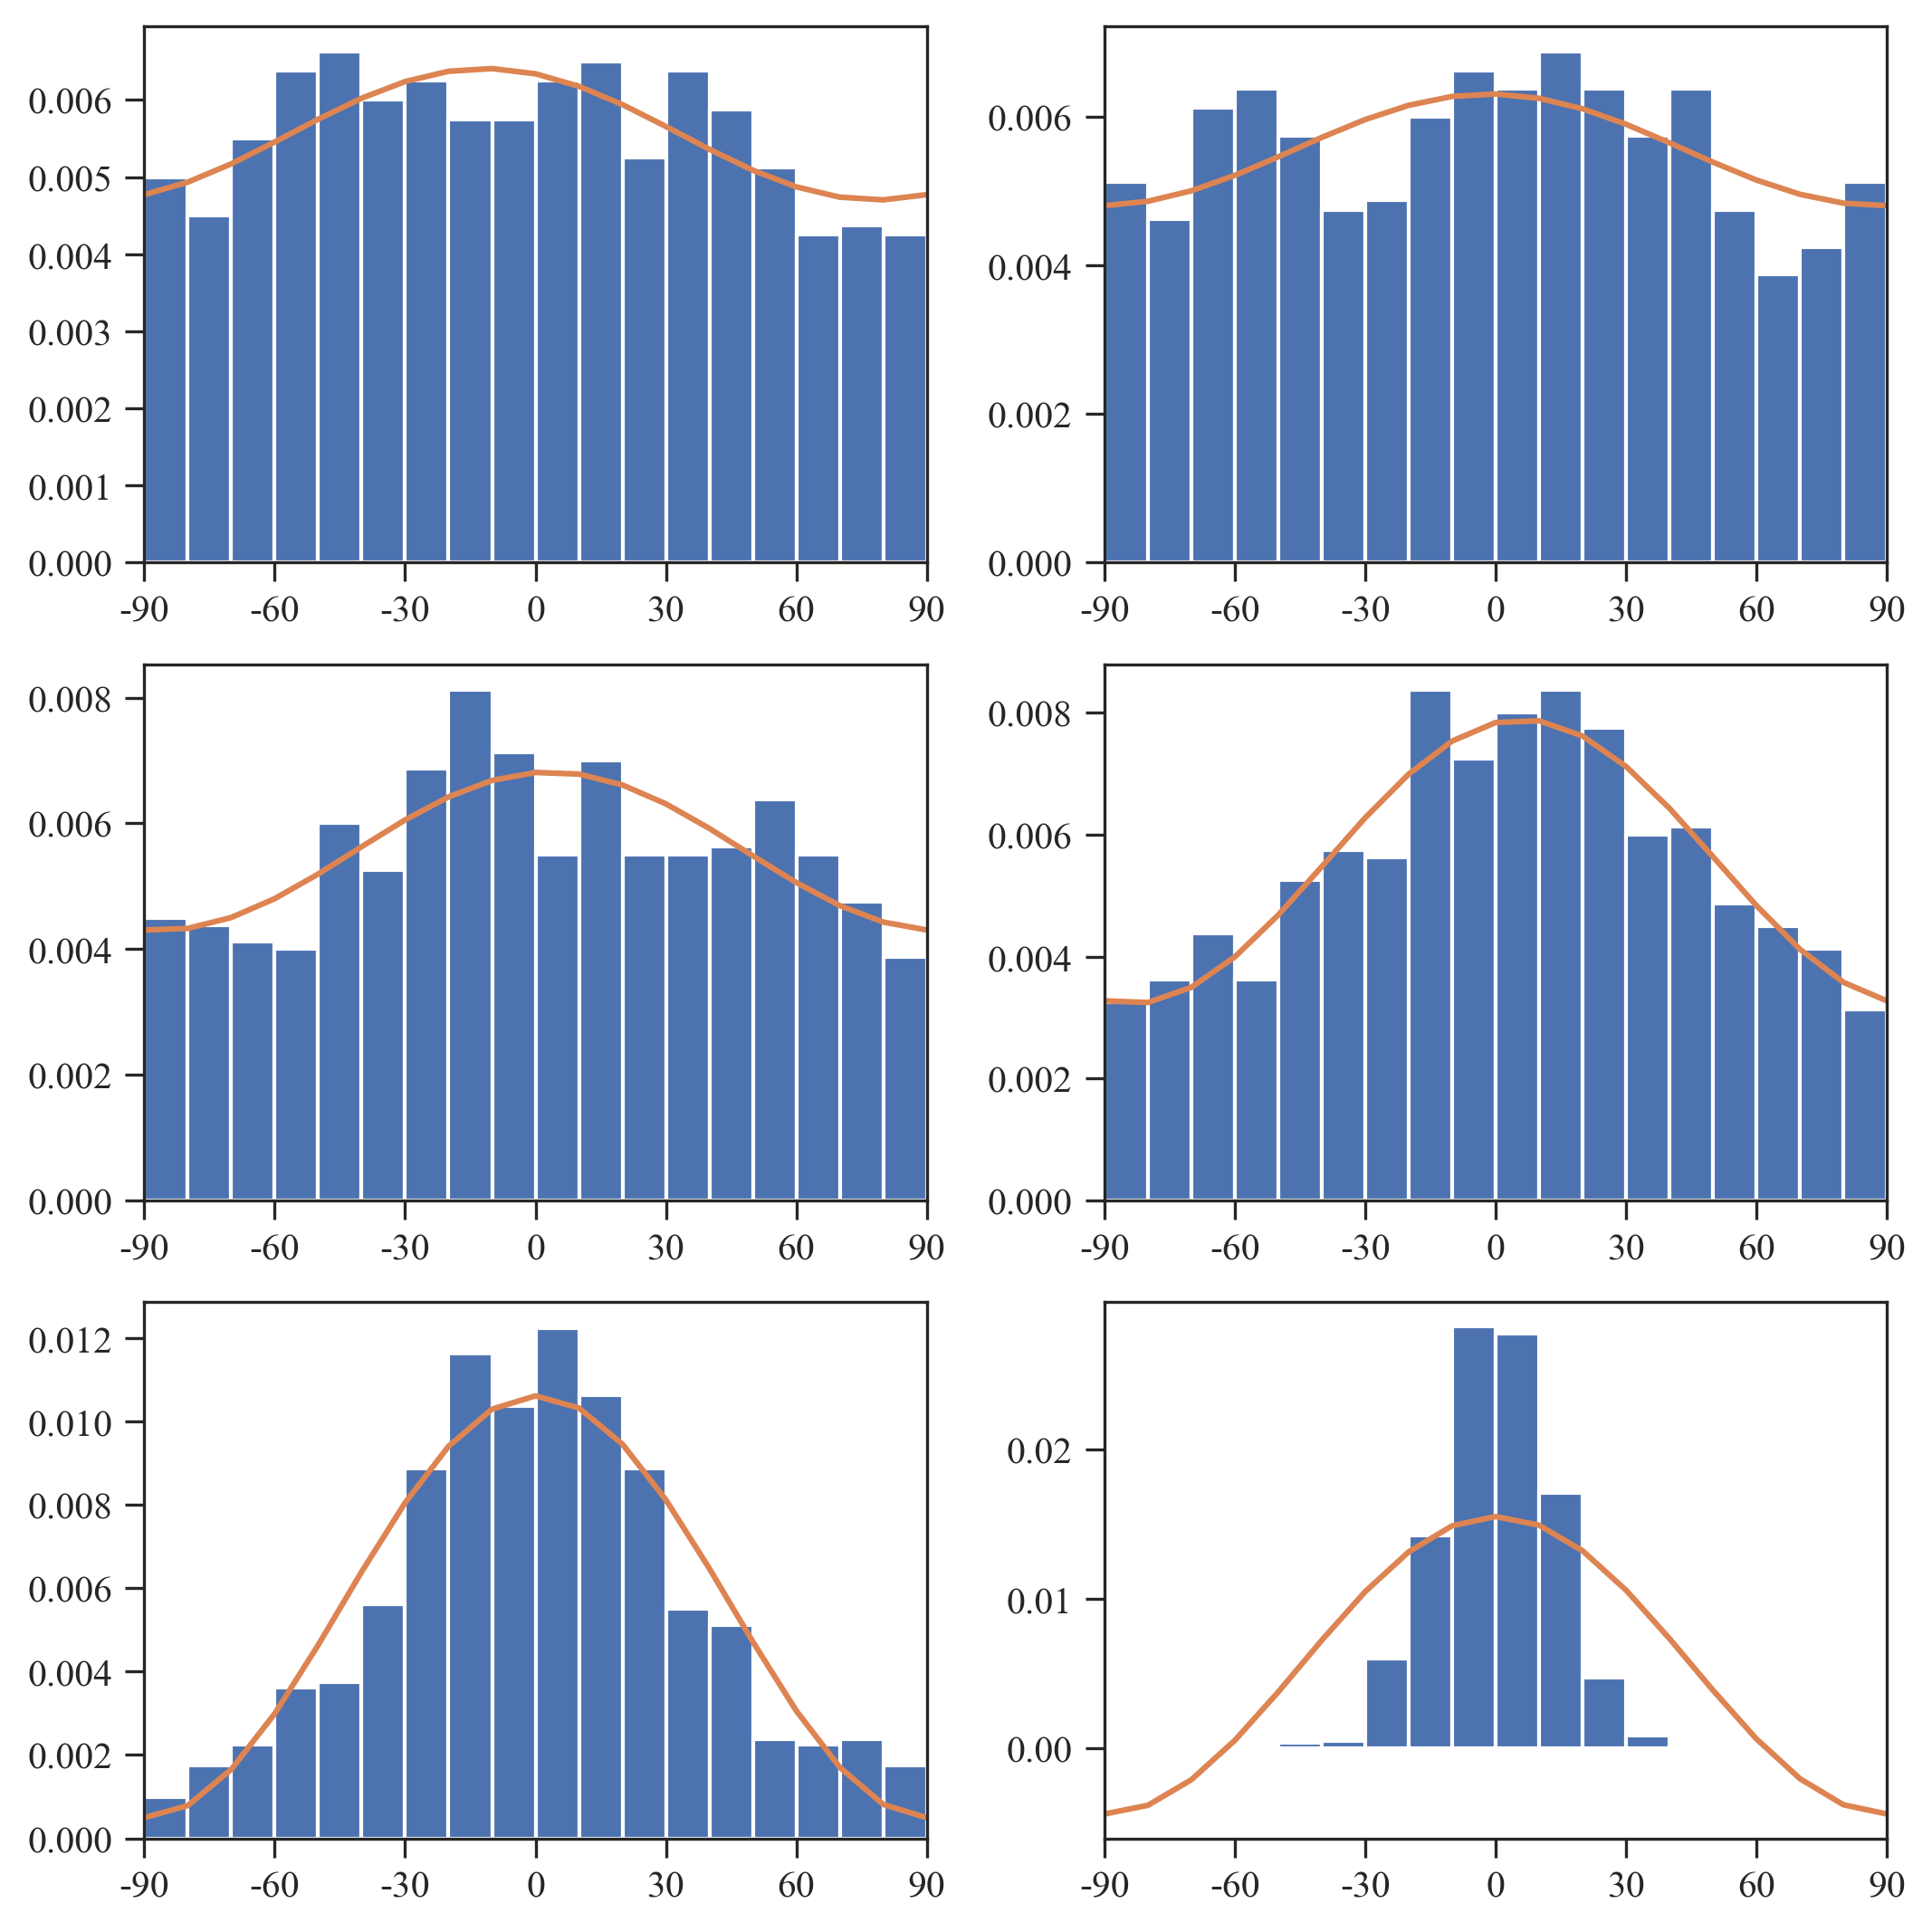

In [4]:
# Generating a set of von Mises distributions:
import orientation_probabilities as op
mu = 0  # deg
phiDomainDeg = (-90, 90)  # fibres have orentation in the range (0, 180) or (-90, 90)
Nf = 800  # Number of fibres - samples of phi (random variable)

phiBins = np.arange(phiDomainDeg[0], phiDomainDeg[1]+1, 10)  # bins of 10 deg width for histogram
dphi = np.mean(phiBins[1:] - phiBins[:-1])
nbins = len(phiBins)
xticks = phiBins[::3]
phiLinear = np.linspace(phiDomainDeg[0], phiDomainDeg[1], 100, endpoint=True)

fig, axes = plt.subplots(3, 2, figsize=(7, 7), dpi=300)
axs = axes.ravel()

for pno, kappa in enumerate([0.1, 0.2, 0.3, 0.5, 1.0, 5.0]):
    # HISTOGRAM
    ax = axs[pno]
    phivals = op.vonmises(muDeg=mu, kappa=kappa, size=Nf)
    phiHist, bins, _ = ax.hist(phivals, bins=phiBins, density=True)
#     phiHist, bins = np.histogram(phivals, bins=phiBins, density=True)
    print("Histogram mean: ", np.mean(phiHist))
    print("Histogram total probability: ", np.sum(phiHist)*dphi)
    ax.set_xlim(phiDomainDeg)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    
    #TENSOR
    Q, A = orient_tensor_2D(phiHist, phiBins, order=2)
    print("Orientation Tensor: ", Q)
    print("Anisotropy Tensor:\n", A)
    
    # ODF
    odf = tensor2odf_2D(phiBins, A) * 2 * np.pi / 180
#     yshift = np.min(odf)
#     if yshift < 0:
#         odf -= yshift
    print("ODF mean: ", np.mean(odf))
    print("Total probability: ", np.sum(odf)*dphi)
    print()
    ax.plot(phiBins, odf)